# ConvexGating tutorial

### Load necessary packages for tutorial
Make sure that the required packages are properly installed. For the installation of **ConvexGating** see https://github.com/buettnerlab/convex_gating#installation.

In [1]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import pandas as pd
from sklearn.datasets import make_blobs

## Generate toy data set
We generate a toy data set with 5000 observations and 12 features originating from 3 cluster centers. Input file format for **ConvexGating** is **anndata**, see https://anndata.readthedocs.io/.

In [2]:
n_features = 12
X,y = make_blobs(5000, n_features=n_features, centers=3,cluster_std = 3)

var_names = []
for j in range(1,n_features+1):
    var_names.append('feature_' +str(j))
    
adata = ann.AnnData(X=X)
adata.var.index = var_names    

## Clustering
At first, apply clustering to obtain labels in an unsupervised fashion. Our method of choice is the **louvain algorithm**. Install the louvain package using pip via **pip install louvain**.

In [3]:
sc.pp.neighbors(adata)
sc.tl.louvain(adata)

## Apply ConvexGating
The standard gating function *cg.gating_strategy* graphically ouputs a gating strategy and its corresponding performance measures. In case the details of a gating strategy (e.g. exact gate locations) need to be extracted, apply *cg.FIND_GATING_STRATEGY* in the following manner.  

### Preprocess 

In [4]:
cell_data = cg.preprocess_adata_gating(adata, cluster_string = 'louvain')


### Find gating strategy for louvain clusters '0' and '2

           hierarchy_1  hierarchy_2
f1            0.994296     0.996388
recall        0.993401     0.992801
precision     0.995192     1.000000


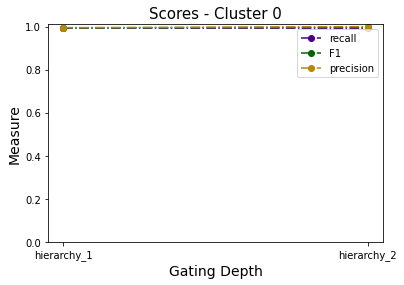

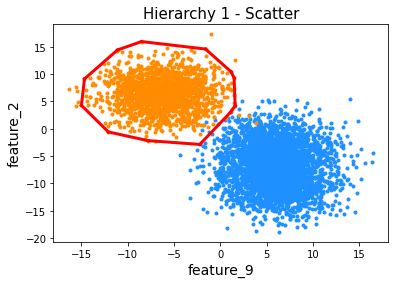

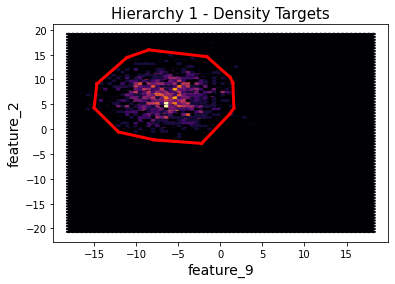

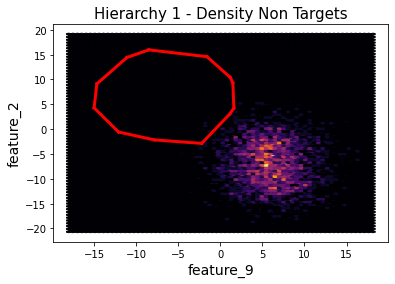

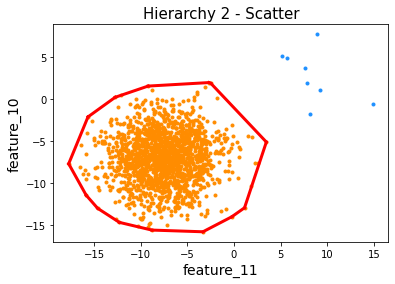

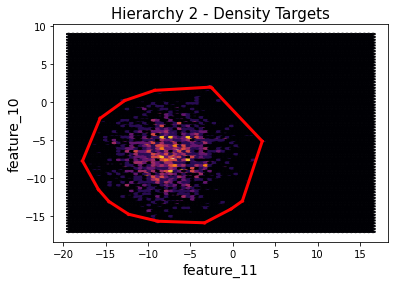

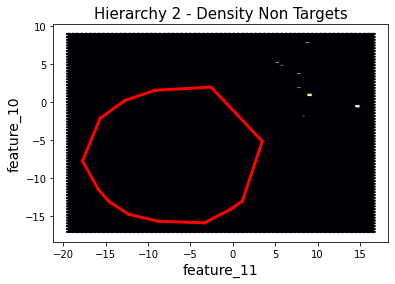

           hierarchy_1
f1            0.999399
recall        0.998800
precision     1.000000


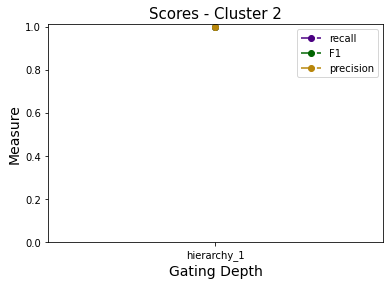

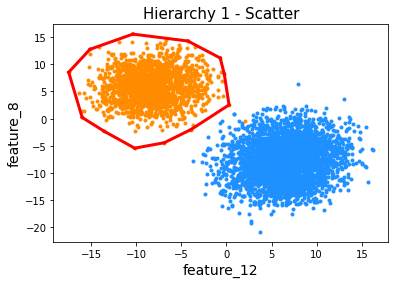

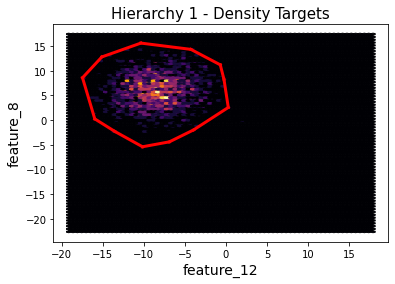

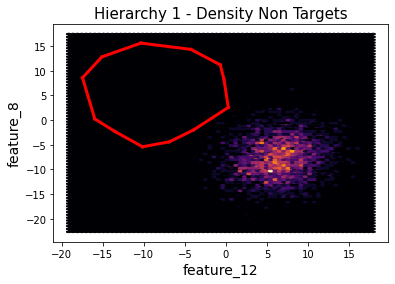

In [5]:
keys, gating_core, gating_overview = cg.FIND_GATING_STRATEGY(cell_data = cell_data,
                                                                          channels = list(adata.var.index),
                                                                          cluster_numbers = ['0','2'],
                                                                          cluster_string = 'louvain')

## Interpret output 

### *keys* 
dictionary that contains *louvain* cluster identifiers

In [6]:
keys

{0: '0', 1: '2'}

###  gating_core
dictionary decoded by 'keys'
- gating_core[0] corresponds to *louvain* cluster from keys[0] (here '0')
- gating_core[1] corresponds to *louvain* cluster from keys[1] (here '2')


#### gating_core[key][0] 
dictionary that shows chosen *features*, *cell labels* and *gate prediction* per cell per hierarchy
- gating_core[key][0]['1'] -> DataFrame for *hierarchy 1* 
- gating_core[key][0]['2'] -> DataFrame for *hierarchy 2* 
- ...


In [7]:
gating_core[0][0]['1'].head(10)

,feature_9,feature_2,label,cell_ID,final_pred
0,5.879904,-5.881339,0.0,0.0,0
1,-6.983514,4.516933,1.0,1.0,1
2,6.249121,-3.740630,0.0,2.0,0
3,5.137291,-1.206260,0.0,3.0,0
4,5.857182,-12.868996,0.0,4.0,0
5,-9.289698,7.695015,1.0,5.0,1
6,-5.910796,7.237768,1.0,6.0,1
7,-2.010108,-4.380441,0.0,7.0,0
8,-2.842171,8.992332,1.0,8.0,1
9,6.922155,-11.062668,0.0,9.0,0


#### gating_core[key][1] 
dictionary that gives detailed information on the gate location (*gate_points* and *gate_edges*) per hierarchy
- gating_core[key][1]['1'] -> dictionary for *hierarchy 1* 
- gating_core[key][1]['2'] -> dictionary for *hierarchy 2* 
- ...

In [8]:
gating_core[0][1]['1']

{'marker_combo': ['feature_9', 'feature_2'],
 'gate_points': array([[  1.3511019 ,  15.03036654],
        [  2.15690655,   6.44680747],
        [ -2.37235749,  -3.5801108 ],
        [  2.00666253,   4.56868172],
        [-10.78064408,  -2.76413002],
        [-15.2080637 ,   2.62404118],
        [-14.09568018,  16.52939339]]),
 'gate_edges': [[array([ 1.3511019 , 15.03036654]),
   array([2.15690655, 6.44680747])],
  [array([ 1.3511019 , 15.03036654]), array([-14.09568018,  16.52939339])],
  [array([2.15690655, 6.44680747]), array([2.00666253, 4.56868172])],
  [array([-2.37235749, -3.5801108 ]), array([2.00666253, 4.56868172])],
  [array([-2.37235749, -3.5801108 ]), array([-10.78064408,  -2.76413002])],
  [array([-10.78064408,  -2.76413002]), array([-15.2080637 ,   2.62404118])],
  [array([-15.2080637 ,   2.62404118]), array([-14.09568018,  16.52939339])]]}

### gating_overview 

####  gating_overview[key]
DataFrame that contains an overview of all features and a one-hot gate membership encoding per individual cell (*final_gate_hierarchy*) 

In [9]:
gating_overview[0].head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,true_label,gate_1,gate_2,new_gate_1,new_gate_2,final_gate_0,final_gate_1,final_gate_2
0,2.599333,-7.318392,-5.458408,9.493281,-6.425782,4.027401,1.547058,6.688442,5.879904,-6.196908,-11.114398,-9.320400,0,0.0,0.0,0,1,1.0,0,0
1,-6.675673,4.134396,-6.348322,0.106058,3.918859,0.108932,-12.358925,-9.032517,-6.983514,-6.631678,-8.475242,7.070563,1,1.0,1.0,1,1,1.0,1,1
2,7.082859,-4.960589,-3.058755,0.558350,-9.381368,5.665962,4.344863,9.986866,6.249121,-2.321880,-8.874934,-10.644170,0,0.0,0.0,0,1,1.0,0,0
3,-11.776117,-2.169200,5.432812,-2.376428,-6.588573,-10.060785,-7.620303,-0.748074,5.137291,1.345013,13.365568,10.303085,0,0.0,0.0,0,0,1.0,0,0
4,2.608005,-15.014684,-6.052884,6.636043,-6.028256,9.562182,2.675938,5.301845,5.857181,-3.989751,-9.306630,-11.585797,0,0.0,0.0,0,1,1.0,0,0
5,-7.046853,7.634773,0.618533,-6.877109,9.366220,1.593061,-5.222800,-12.656343,-9.289698,0.592709,-3.989243,6.745496,1,1.0,1.0,1,1,1.0,1,1
6,0.122197,7.131156,-6.415363,-8.804458,4.248704,1.434831,-3.910208,-10.840595,-5.910796,-8.615654,-4.913568,1.949228,1,1.0,1.0,1,1,1.0,1,1
7,6.225758,-5.665284,1.658268,3.732546,-9.885760,7.154741,5.780903,8.021055,-2.010108,-3.850430,-9.413647,-8.847355,0,0.0,0.0,0,1,1.0,0,0
8,-10.632997,9.063657,-2.884109,-5.291222,4.181280,5.021161,-6.726564,-7.405513,-2.842170,-10.066222,-7.967146,4.702981,1,1.0,1.0,1,1,1.0,1,1
9,6.655985,-13.025171,-3.282125,2.980172,-9.701137,-0.721660,4.414274,6.211676,6.922155,-4.918908,-9.975337,-11.528255,0,0.0,0.0,0,1,1.0,0,0
